# Clustering data

## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Importing data set

In [21]:
data = pd.read_excel('Customer_DATA.xlsx')
print(data.head())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   50    1               6     156      1.590       1.073   
1            2   23    2               9      88      1.941      32.909   
2            3   64    1               5     270      8.890      18.157   
3            4   82    4              30     387      5.273      22.486   
4            5   20    1              28     131      6.448      25.258   

   Defaulted Address  DebtIncomeRatio  
0        0.0  ABC151             28.9  
1        0.0  ABC152             39.7  
2        1.0  ABC153             37.2  
3        0.0  ABC154              4.8  
4        0.0  ABC155             17.5  


## Checking null values 
Removing non-important features i.e. Id and Address.

Removing Defaulted as it has 20% null values and filling it with mean or most frequent item will affect the results. 

In [22]:
data.isnull().sum()

Customer Id         0
Age                 0
Edu                 0
Years Employed      0
Income              0
Card Debt           0
Other Debt          0
Defaulted          84
Address             0
DebtIncomeRatio     0
dtype: int64

In [7]:
data.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [23]:
descriptive_features = data[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']]
descriptive_features

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,50,1,6,156,1.590,1.073,28.9
1,23,2,9,88,1.941,32.909,39.7
2,64,1,5,270,8.890,18.157,37.2
3,82,4,30,387,5.273,22.486,4.8
4,20,1,28,131,6.448,25.258,17.5
...,...,...,...,...,...,...,...
444,59,3,39,287,5.715,20.102,21.1
445,75,2,28,158,1.714,4.897,7.0
446,71,1,9,387,8.126,22.225,11.2
447,71,1,1,295,8.426,17.871,31.4


In [25]:
descriptive_features.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

## Min max scaler for normalising data

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(descriptive_features))

print(scaler.data_max_)
descriptive_features = scaler.transform(descriptive_features)
descriptive_features


MinMaxScaler()
[ 90.      4.     40.    398.      9.     38.833  41.   ]


array([[4.44444444e-01, 0.00000000e+00, 1.50000000e-01, ...,
        7.11957884e-02, 2.64823495e-05, 7.04156479e-01],
       [6.94444444e-02, 3.33333333e-01, 2.25000000e-01, ...,
        1.15191777e-01, 8.43118561e-01, 9.68215159e-01],
       [6.38888889e-01, 0.00000000e+00, 1.25000000e-01, ...,
        9.86212083e-01, 4.52450941e-01, 9.07090465e-01],
       ...,
       [7.36111111e-01, 0.00000000e+00, 2.25000000e-01, ...,
        8.90448734e-01, 5.60181139e-01, 2.71393643e-01],
       [7.36111111e-01, 0.00000000e+00, 2.50000000e-02, ...,
        9.28052143e-01, 4.44876989e-01, 7.65281174e-01],
       [6.66666667e-01, 0.00000000e+00, 4.00000000e-01, ...,
        9.44346954e-01, 2.90696751e-01, 2.64058680e-01]])

In [27]:
descriptive_features

array([[4.44444444e-01, 0.00000000e+00, 1.50000000e-01, ...,
        7.11957884e-02, 2.64823495e-05, 7.04156479e-01],
       [6.94444444e-02, 3.33333333e-01, 2.25000000e-01, ...,
        1.15191777e-01, 8.43118561e-01, 9.68215159e-01],
       [6.38888889e-01, 0.00000000e+00, 1.25000000e-01, ...,
        9.86212083e-01, 4.52450941e-01, 9.07090465e-01],
       ...,
       [7.36111111e-01, 0.00000000e+00, 2.25000000e-01, ...,
        8.90448734e-01, 5.60181139e-01, 2.71393643e-01],
       [7.36111111e-01, 0.00000000e+00, 2.50000000e-02, ...,
        9.28052143e-01, 4.44876989e-01, 7.65281174e-01],
       [6.66666667e-01, 0.00000000e+00, 4.00000000e-01, ...,
        9.44346954e-01, 2.90696751e-01, 2.64058680e-01]])

## Finding the optimum number of clusters for k-means classification

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are. This is what the KMeans tries to minimize with each iteration.

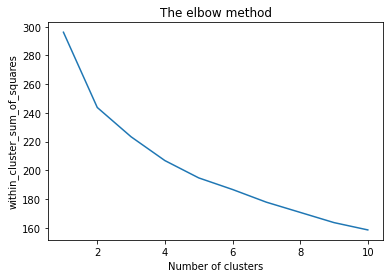

In [28]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(descriptive_features)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()


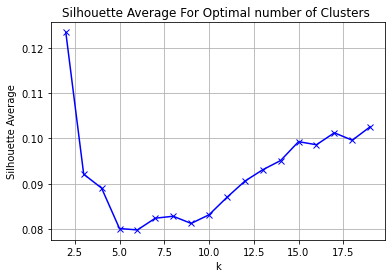

In [29]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

SS_distances= []
I = range(2,20)
for i in I:
       HC = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
       HC= HC.fit(descriptive_features)
       score_H= metrics.silhouette_score(descriptive_features, HC.labels_)
       SS_distances.append(score_H)

# plotting Silhouette for different clusters
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()
#HC = AgglomerativeClustering(distance_threshold=40,n_clusters=None, affinity='euclidean', linkage='ward')
